In [1]:
# Import the necessary libraries, including Pandas
import pandas as pd

In [2]:
# Load the Dataset
dataset_path = 'amz_uk_price_prediction_dataset.csv'  # Replace with your dataset path
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Top 5 product categories

df["category"].value_counts().head(5)  

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

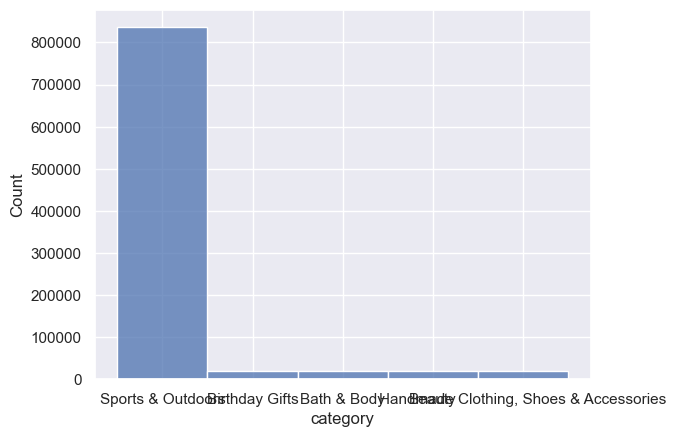

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")

# Get the top 5 product categories
top_categories = df["category"].value_counts().head(5).index

# Filter the dataframe to include only the top 5 categories
filtered_df = df[df["category"].isin(top_categories)]

# Plot the histogram
sns.histplot(data=filtered_df, x="category")
plt.show()

In [5]:
""" **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?
"""

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

Mean Price: 89.24380943923663
Median Price: 19.09
Mode Price: 9.99


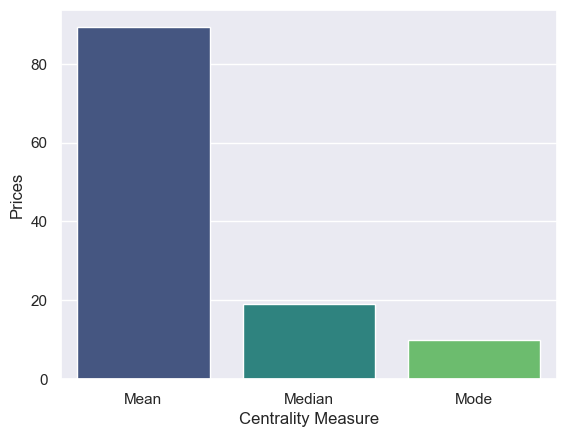

In [6]:
# Create a DataFrame for centrality measures
centrality_df = pd.DataFrame({
    'Centrality Measure': ['Mean', 'Median', 'Mode'],
    'Prices': [mean_price, median_price, mode_price]
})

# Plot the centrality measures
sns.barplot(
    x="Centrality Measure",
    y='Prices',
    hue='Centrality Measure',
    data=centrality_df,
    palette='viridis'
)
plt.show()

In [7]:
""" **Measures of Dispersion**: Average price point of products is 89 GBP  with median of 19.09 GBP. 
THE mode price is 9.99 GBP. The mean price is higher than the median and mode, which indicates that the distribution of prices is ***right-skewed***. """


' **Measures of Dispersion**: Average price point of products is 89 GBP  with median of 19.09 GBP. \nTHE mode price is 9.99 GBP. The mean price is higher than the median and mode, which indicates that the distribution of prices is ***right-skewed***. '

In [8]:
"""**Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?
"""
df.price.std()


345.6088617535223

In [9]:
df.price.var()

119445.4853225653

In [10]:
df_range = df.price.max() - df.price.min()
df_range

100000.0

In [11]:
df_qr1 = df.price.quantile(0.25)
df_qr1

9.99

In [12]:
df_qr2 = df.price.quantile(0.75)
df_qr2

45.99

In [13]:
df_interquartile_range = (df_qr2 - df_qr1)
df_interquartile_range

36.0

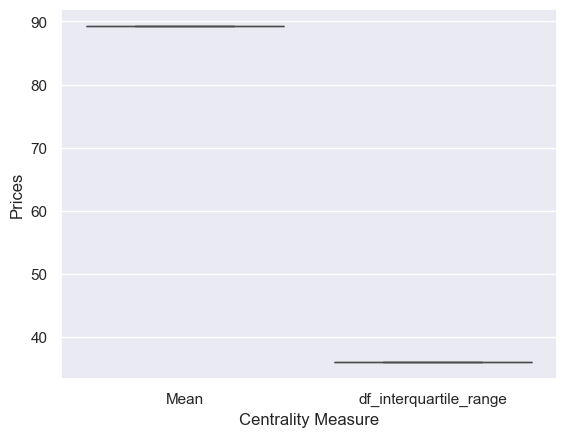

In [14]:
# Create a DataFrame for centrality measures
centrality_df = pd.DataFrame({
	'Centrality Measure': ['Mean', 'df_interquartile_range' ],
	'Prices': [mean_price, df_interquartile_range]
})

# Plot the boxplot for price distribution
sns.boxplot(x=centrality_df["Centrality Measure"], y=centrality_df["Prices"])
plt.show()
